<img src="images/kiksmeisedwengougent.png" alt="Banner" width="1100">

<div>
    <font color=#690027 markdown="1">   
        <h1>HOOGTE BOMEN EN AFMETINGEN STOMATA IN HET AMAZONEWOUD</h1>
    </font>
</div>

<div class="alert alert-box alert-success">
Onderzoekers uit Brazilië onderzochten met lineaire regressie of er een verband is tussen het aantal huidmondjes op bladeren in de kruin van een boom en de hoogte van de boom. In deze notebook ga je met hun data aan de slag en pas je er zelf lineaire regressie op toe. Je kan tot slot jouw resultaten vergelijken met die van de wetenschappers. 
</div>

De regressielijn kan je rechtstreeks vinden met formules uit de wiskunde, maar hier pas je een techniek uit machinaal leren toe.

<div class="alert alert-block alert-warning">
In het leerpad 'Lineaire regressie' vind je uitleg over de basis van lineaire regressie.
</div>

Paleoklimatologen hebben aangetoond dat er een verband is tussen het aantal en de grootte van stomata op bladeren en het CO<sub>2</sub>-gehalte in de atmosfeer toen deze planten groeiden.<br>
Vandaag de dag wordt er wereldwijd door wetenschappers onderzoek gedaan naar de huidmondjes op bladeren van nu. <br> Bij sommige planten ontdekte men verschillen in de stomata van bladeren ontsproten in lente tegenover die in de zomer. Bij andere planten stelde men verschillen vast tussen bladeren in de kruin van een plant en de beschaduwde bladeren onderaan in de plant.<br>
Vast staat dat het aantal en de grootte van de huidmondjes onderhevig is aan omgevingsfactoren.<br> <br>
De onderzoekers Camargo en Marenco uit Brazilië vroegen zich het volgende af:<br>
**Is er een verband tussen het aantal huidmondjes op bladeren in de kruin van een boom en de hoogte van de boom?**<br>
Om dit te onderzoeken gebruikten ze data verzameld in het Amazonewoud [1].

### Nodige modules importeren

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit    # voor regressie
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<div style='color: #690027;' markdown="1">
    <h2>1. Inlezen van de data</h2> 
</div>

In [2]:
amazone = pd.read_csv("data/amazone.csv")  

<div style='color: #690027;' markdown="1">
    <h2>2. Tonen van de ingelezen data</h2> 
</div>

In [3]:
# dataset weergeven in tabel
amazone

,naam plant,stomatale dichtheid,lengte stomata,hoogte boom
0,Anisophyllea manausensis Pires & W. A. Rodr,271.10,17.72,24.19
1,Antonia ovata Pohl.,287.93,17.18,16.85
2,Astronium le-cointei Ducke,652.11,12.56,25.80
3,Couratari tauari Berg.,234.70,15.73,16.66
4,Duroia kotchubaeiodissteyerm,219.74,16.78,23.41
5,Ecclinusa guianensis Eyma,316.56,10.70,30.05
6,Eschweileira bracteosa (poepp. Beng) Miers,657.54,13.47,23.78
7,Eschweilera apiculata (miers) a. c. smith,442.01,14.29,29.64
8,Eschweilera coriacea (DC.) Mart. ex Berg,411.20,12.45,23.15
9,Eschweilera parviflora (Aubl.) Miers,500.10,8.25,25.35


<div style='color: #690027;' markdown="1">
    <h2>3. De lineaire samenhang tussen de data nagaan via de correlatiecoëfficiënt</h2> 
</div>

<div class="alert alert-block alert-warning">
Meer uitleg over de correlatiecoëfficiënt vind je in de notebook 'Standaardiseren'.
</div>

Beschouw elk kenmerk.

In [4]:
x1 = amazone["stomatale dichtheid"] 
x2 = amazone["lengte stomata"]
x3 = amazone["hoogte boom"]    

Bepaal de correlatiecoëfficiënt R voor twee kenmerken uit de tabel. Is er een sterke, matige of zwakke lineaire samenhang tussen de kenmerken?

In [5]:
# in hoeverre is er lineair verband tussen lengte en dichtheid van stomata?
# correlatiecoefficiênt R bepalen (ligt tussen -1 en 1, hoe dichter bij 0, hoe slechter lineaire samenhang)
np.corrcoef(x2, x1)[0,1]

-0.5473323361748896

Matige lineaire samenhang!

<div class="alert alert-box alert-success">
Er is een gekend verband tussen de dichtheid van de huidmondjes en de grootte ervan. Het verband wordt best niet beschouwd als lineair maar kan het best weergegeven worden door een kromme.  
</div>

In [6]:
# in hoeverre is er lineair verband tussen hoogte van boom en dichtheid van stomata? 
np.corrcoef(x3, x1)[0,1]

0.3469699169562766

Er is een zwakke lineaire samenhang tussen de hoogte van boom en de stomatale dichtheid!

In [7]:
# in hoeverre is er lineair verband tussen hoogte van boom en lengte van stomata? 
np.corrcoef(x3, x2)[0,1]

-0.131061687629056

Heel, heel zwakke lineaire samenhang!

<div style='color: #690027;' markdown="1">
    <h2>4. Regressielijn voor verband stomatale dichtheid en hoogte boom</h2> 
</div>

Camargo en Marenco bepaalden met Excel de regressielijn die de, weliswaar zwakke, lineaire samenhang tussen de stomatale dichtheid en de hoogte van de boom visualiseert. Ze hanteerden de rechte die de stomatale dichtheid uitzet in functie van de hoogte van de boom. Gebruikmakend van de gegeven data kan je dit zelf met de ingebouwde algoritmes van de Python-module scikit-learn doen en je resultaat met dat van hen vergelijken.<br>
Nadien doe je nog eens hetzelfde maar dan volgens de methode die gehanteerd wordt door computerwetenschappers. Zij reserveren een deel van de data om de kwaliteit van het model na te gaan.

Je zal hier werken met de data opgeslagen in x1 en x3 (x1 bevat de stomatale dichtheden en x3 de hoogtes van de bomen). Bij de grafische voorstelling komt x3 op de y-as en x1 op de x-as.

Voor beide methodes geldt dat de data worden gestandaardiseerd. 

<div class="alert alert-block alert-warning">
Meer uitleg over het belang van standaardiseren vind je in de notebook 'Standaardiseren'.
</div>

We zullen voor beide methodes werken met NumPy arrays om alle functionaliteiten van NumPy te kunnen gebruiken.

<div style='color: #690027;' markdown="1">
    <h3>4.1 Methode van de Braziliaanse onderzoekers (dezelfde methode als in de wiskundeles)</h3> 
</div>

In [8]:
x1 = np.array(x1) 
x3 = np.array(x3) 
print(x1, x3)

[271.1  287.93 652.11 234.7  219.74 316.56 657.54 442.01 411.2  500.1
 204.59 477.6  395.7  389.81 280.64 458.01 314.11 367.08 540.51 489.16
 405.96 110.29 150.06 285.64 569.38 284.57 277.83 212.16 580.93 588.5
 589.35 846.13 175.43 526.2  543.88] [24.19 16.85 25.8  16.66 23.41 30.05 23.78 29.64 23.15 25.35 27.5  22.09
 19.4  29.7  31.28 20.63 23.66 19.22 25.39 32.39 26.37 17.87 24.55 20.02
 35.96 24.86 25.2  27.63 22.31 22.8  18.87 33.04 19.49 31.6  27.79]


Om vanuit de gestandaardiseerde variabelen te kunnen terugkeren naar de oorspronkelijke sla je het gemiddelde en de standaardafwijking van de variabelen op, zodat je er verder in de notebook gebruik kunt van maken.

In [9]:
# gemiddelde en standaardafwijking van variabelen opslaan voor gebruik verder in notebook
x1_gem = np.mean(x1)
x1_std = np.std(x1)
x3_gem = np.mean(x3)
x3_std = np.std(x3)

De methode werkt als volgt: eerst de data standaardiseren, dan de data omzetten naar het gewenste formaat, de regressielijn bepalen en samen met de puntenwolk weergeven op een grafiek.

In [13]:
# data standaardiseren
x1 = (x1 - np.mean(x1)) / np.std(x1)   # stomatale dichtheid
x3 = (x3 - np.mean(x3)) / np.std(x3)   # hoogte boom

# gewenste formaat en standaardnotatie voor regressie met scikit-learn
x = x3                   # x3 fungeert als input
y = x1                   # x1 fungeert als output

In [14]:
# regressielijn is rechte

# ingeven hoe vergelijking rechte is opgebouwd 
def rechte(x, a, b):
    """Voorschrift (schuine) rechte met variabele x en coëfficiënten a en b."""
    return a * x + b

# rechte zoeken die beste past bij bepaalde data, vergelijking tonen en coëfficiënten teruggeven
def linreg(x, y):
    """Rechte best passend bij data x en y."""
    popt, pcov = curve_fit(rechte, x, y)            # curve_fit() kijkt in def rechte() hoe functievoorschrift eruitziet
    # curve_fit() geeft twee zaken terug, waaraan gerefereerd wordt met popt en pcov
    # enkel eerste nodig, popt, die a en b van gezochte rechte geeft
    a, b = popt                                     # coëfficiënten
    print("y = ", a, "x +", b)                      # toon vergelijking regressielijn
    return a, b                                     # geeft coëfficiënten terug van vergelijking regressielijn

In [15]:
# coëfficiënten regressielijn bij gegeven punten
a, b = linreg(x, y)
print(a, b)

y =  0.3469699181654493 x + -1.9483628044270063e-09
0.3469699181654493 -1.9483628044270063e-09


In [16]:
# lineaire regressie
y_regressielijn = rechte(x, a, b)    

In [17]:
# metrics
print("R² voor de rechte: %.3f" % r2_score(y, y_regressielijn))
print("Gemiddelde kwadratische afwijking voor de rechte: %.2f"% mean_squared_error(y, y_regressielijn))

R² voor de rechte: 0.120
Gemiddelde kwadratische afwijking voor de rechte: 0.88


### Grafiek

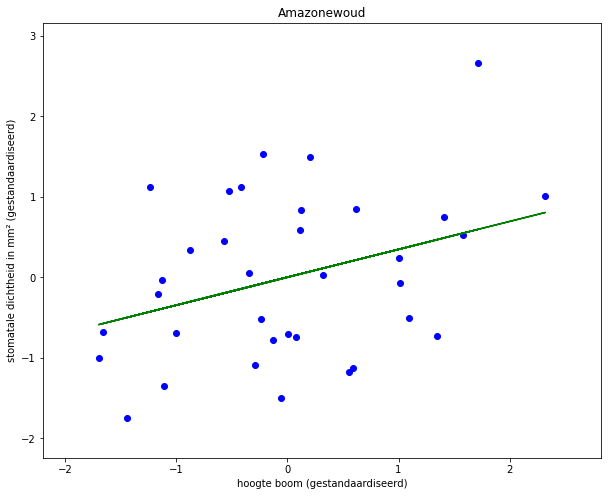

In [18]:
# grafische voorstelling
plt.figure(figsize=(10, 8))

plt.xlim(x3.min()-0.5, x3.max()+0.5)
plt.ylim(x1.min()-0.5, x1.max()+0.5)
plt.title("Amazonewoud")
plt.xlabel("hoogte boom (gestandaardiseerd)")
plt.ylabel("stomatale dichtheid in mm² (gestandaardiseerd)")

plt.scatter(x3, x1, color="blue", marker="o")
plt.plot(x, y_regressielijn, color="green")

plt.show()

In [19]:
# vergelijking van rechte met gestandaardiseerde variabelen
print("De vergelijking van de rechte: y =", a, "x +", b)

De vergelijking van de rechte: y = 0.3469699181654493 x + -1.9483628044270063e-09


### Resultaat vergelijken met dat van de Braziliaanse wetenschappers

Vergelijk de vergelijking van de regressielijn met die van de wetenschappers. Je zal daarvoor vanuit de gestandaardiseerde variabelen moeten terugkeren naar de oorspronkelijke. Let erop dat je daarvoor het oorspronkelijke gemiddelde en de oorspronkelijke standaardafwijking gebruikt. 

In [20]:
# vergelijking van rechte zonder standaardiseren
print("De vergelijking van de rechte: y =", 
      a * x1_std / x3_std, "x +", b * x1_std + x1_gem - a * x3_gem * x1_std / x3_std)

De vergelijking van de rechte: y = 12.068440569324821 x + 102.14483868982671


Deze vergelijking komt overeen met de resultaten van de Braziliaanse onderzoekers. Ook R² komt overeen (R² is onafhankelijk van het standaardiseren).

<div style='color: #690027;' markdown="1">
    <h3>4.2 Methode uit machinaal leren (met trainingdata en testdata)</h3> 
</div>

<div class="alert alert-box alert-info">
Binnen machinaal leren gaat men als volgt te werk: de data worden opgesplitst in trainingdata en testdata.<br> <em>De trainingdata worden gebruikt om een wiskundig model op te stellen. <br>Met de testdata wordt nagegaan of het model goed presteert op nieuwe data.</em><br>
Om te kijken hoe goed het model presteert wordt de gemiddelde kwadratische afwijking berekend.
</div>

In [21]:
# oorspronkelijke data
x1 = amazone["stomatale dichtheid"]   
x3 = amazone["hoogte boom"] 
x1 = np.array(x1) 
x3 = np.array(x3) 

# trainingdata
x_train = x3[0:29]
y_train = x1[0:29]

# testdata
x_test = x3[29:]
y_test = x1[29:]

De training- en testdata worden als volgt **gestandaardiseerd**: van elke gegeven uit de trainingdata wordt het gemiddelde van de trainingdata afgetrokken en vervolgens wordt het resultaat gedeeld door de standaardafwijking van de trainingdata. <br> 
De volledige dataset wordt op dezelfde manier gestandaardiseerd. Men doet dus net hetzelfde met de testdata: men gebruikt er ook het gemiddelde en de standaardafwijking van de **trainingdata**. 

In [22]:
# standaardiseren

# gemiddelde en standaardawijking van trainingdata bepalen
x_train_gem = np.mean(x_train)
x_train_std = np.std(x_train)
y_train_gem = np.mean(y_train)
y_train_std = np.std(y_train)

# trainingdata standaardiseren
x_train = (x_train - x_train_gem) / x_train_std
y_train = (y_train - y_train_gem) / y_train_std

# testdata standaardiseren
x_test = (x_test - x_train_gem) / x_train_std
y_test = (y_test - y_train_gem) / y_train_std


In [23]:
# lineaire regressie
# regressielijn bepalen a.d.h.v. trainingdata
a, b = linreg(x_train, y_train)
y_regressie = rechte(x_train, a, b)  
y_voorspeld = rechte(x_test, a, b)    

# gemiddelde kwadratische afwijking t.o.v. de trainingdata
print("Gemiddelde kwadratische afwijking voor de rechte m.b.t. de trainingdata: %.2f"% mean_squared_error(y_train, y_regressie))

# gemiddelde kwadratische afwijking t.o.v. de testdata (generalisatie)
print("Gemiddelde kwadratische afwijking voor de rechte m.b.t. de testdata: %.2f"% mean_squared_error(y_test, y_voorspeld))

y =  0.2591639120115884 x + -2.1800339311539574e-12
Gemiddelde kwadratische afwijking voor de rechte m.b.t. de trainingdata: 0.93
Gemiddelde kwadratische afwijking voor de rechte m.b.t. de testdata: 2.78


C:\Users\idlab361\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


### Grafiek

In [24]:
# bereik inschatten
x_train.min(), x_train.max(), x_test.min(), x_test.max(), y_train.min(), y_train.max(), y_test.min(), y_test.max()

(-1.7325572749816225,
 2.451385024743164,
 -1.253463363976867,
 1.8183740654065639,
 -1.8229870965727997,
 1.9894714392307897,
 -1.3691843573818525,
 3.3032979449725883)

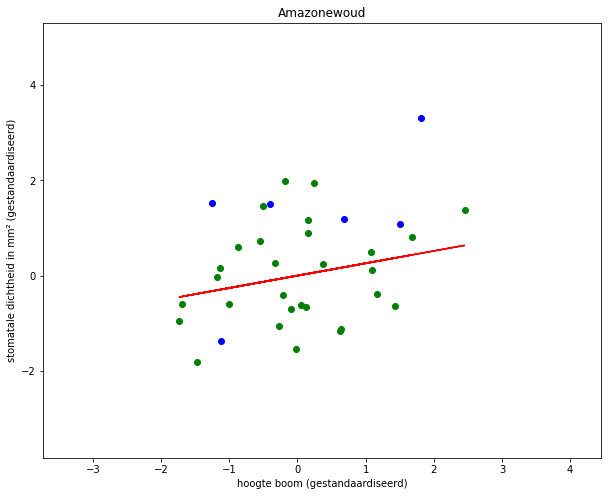

In [25]:
# grafische voorstelling
plt.figure(figsize=(10, 8))

plt.xlim(x_train.min()-2, x_train.max()+2)
plt.ylim(y_train.min()-2, y_test.max()+2)
plt.title("Amazonewoud")
plt.xlabel("hoogte boom (gestandaardiseerd)")
plt.ylabel("stomatale dichtheid in mm² (gestandaardiseerd)")

plt.scatter(x_train, y_train, color="green", marker="o")
plt.plot(x_train, y_regressie, color="red")

# testdata
plt.scatter(x_test, y_test, color="blue", marker="o")

plt.show()

Interpretatie: 
Gemiddelde kwadratische afwijking voor de rechte m.b.t. de trainingdata is 0,93.
Gemiddelde kwadratische afwijking voor de rechte m.b.t. de testdata is 2,78. Deze fout is groter, dus niet zo'n goede generalisatie.<br>

In [26]:
# vergelijking van rechte
print("De vergelijking van de rechte: y =", a, "x +",b)

De vergelijking van de rechte: y = 0.2591639120115884 x + -2.1800339311539574e-12


In [27]:
# vergelijking van rechte zonder standaardiseren
print("De vergelijking van de rechte: y =", 
      a * y_train_std/x_train_std, "x +",
      b * y_train_std + y_train_gem - a * x_train_gem *y_train_std/x_train_std)

De vergelijking van de rechte: y = 8.064613262832383 x + 173.1568045606698


## Uitschieter

Merk op dat een bepaald punt van de testset allicht beschouwd kan worden als uitschieter. Bekijk eens wat de generalisatie is zonder dit punt. 

In [28]:
# index uitschieter in de testset bepalen 
print(x_test, y_test)

[-0.40149998 -1.25346336  1.81837407 -1.11905693  1.50620428  0.68025505] [ 1.50849905  1.51442064  3.30329794 -1.36918436  1.07448139  1.19765045]


De uitschieter staat op de derde positie in de lijst en heeft dus index 2.

In [31]:
# testdata zonder uitschieter
x_2_test = np.delete(x_test, 2)
y_2_test = np.delete(y_test, 2)
print(x_2_test)
print(y_2_test)
y_voorspeld_zonderuitschieter = rechte(x_2_test, a, b)

[-0.40149998 -1.25346336 -1.11905693  1.50620428  0.68025505]
[ 1.50849905  1.51442064 -1.36918436  1.07448139  1.19765045]


In [32]:
print("Gemiddelde kwadratische afwijking voor de rechte m.b.t. de testdata: %.2f"% mean_squared_error(y_2_test, y_voorspeld_zonderuitschieter))

Gemiddelde kwadratische afwijking voor de rechte m.b.t. de testdata: 1.73


Dat is al heel wat beter.

<div style='color: #690027;' markdown="1">
    <h2>5. Opdracht: bepaal de regressielijn voor verband stomatale dichtheid en lengte</h2> 
</div>

Eerder in deze notebook berekende je de correlatiecoëfficiënt van de lengte van de stomata en de stomatale dichtheid. De lineaire samenhang tussen deze kenmerken is matig. 

In [ ]:
x1 = amazone["stomatale dichtheid"]
x2 = amazone["lengte stomata"]
np.corrcoef(x2, x1)[0,1]

Omdat de correlatiecoëfficiënt negatief is, is de regressielijn dalend.

In [ ]:
# puntenwolk
plt.figure(figsize=(10, 8))

plt.xlim(0, 1000)
plt.ylim(0, 50)
plt.title("Amazonewoud")
plt.xlabel("stomatale dichtheid in mm²")
plt.ylabel("lengte stomata in micron")

plt.scatter(x1, x2, color="blue", marker="o")

plt.show()

### Opdracht 5.1
Bepaal de regressielijn en geef je resultaat weer op de grafiek. 

### Extra opdracht 5.2

Bepaal deze regressielijn met je grafisch rekentoestel en vergelijk het resultaat.

Besluit:

<div class="alert alert-block alert-warning">
In de notebooks 'ZeeniveauLineaireRegressie', 'ZeeniveauRegressie' en 'ZeeniveauMLRegressie' leer je hoe je naast een rechte een kromme vindt die het beste past bij een gegeven puntenwolk. Je leert er ook over underfitting en overfitting.   
</div>

<div>
    <h2>Referentielijst</h2> 
</div>

[1] Camargo, Miguel Angelo Branco, & Marenco, Ricardo Antonio. (2011). Density, size and distribution of stomata in 35 rainforest tree species in Central Amazonia. Acta Amazonica, 41(2), 205-212. https://dx.doi.org/10.1590/S0044-59672011000200004 en via e-mail.<br>

<div>
    <h2>Met steun van</h2> 
</div>

<img src="images/kikssteun.png" alt="Banner" width="1100"/>

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook KIKS, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>.